In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [49]:
dataset = pd.read_csv("Housing.csv")

In [50]:
dataset.shape

(545, 13)

In [51]:
dataset.head(9)

,prefarea,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,yes,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,no,8960,4,4,4,yes,no,no,no,yes,3,furnished,12250000
2,yes,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,yes,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,no,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000
5,yes,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,10850000
6,yes,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,10150000
7,no,16200,5,3,2,yes,no,no,no,no,0,unfurnished,10150000
8,yes,8100,4,1,2,yes,yes,yes,no,yes,2,furnished,9870000


In [52]:
dataset.dtypes

prefarea            object
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
price                int64
dtype: object

In [53]:
print(dataset.index)

RangeIndex(start=0, stop=545, step=1)


<Axes: >

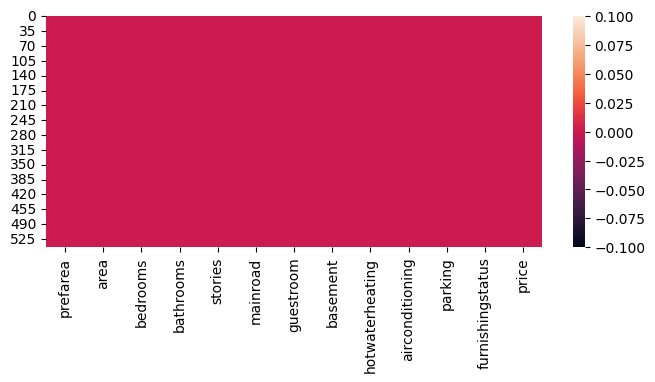

In [54]:
plt.figure(figsize  = (8,3))
sns.heatmap(dataset.isnull())

In [55]:
(dataset.isnull().sum().sum()/(dataset.shape[1]*dataset.shape[0]))*100

np.float64(0.0)

In [56]:
(dataset.isnull().sum()/dataset.shape[0])*100

prefarea            0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
furnishingstatus    0.0
price               0.0
dtype: float64

In [57]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 6
Float variables: 0


In [58]:
dataset.head(3)

,prefarea,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,yes,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,no,8960,4,4,4,yes,no,no,no,yes,3,furnished,12250000
2,yes,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000


In [59]:
dataset.isnull().sum()

prefarea            0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
price               0
dtype: int64

In [60]:
dataset.select_dtypes(include = "float64").columns

Index([], dtype='object')

In [61]:
dataset.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


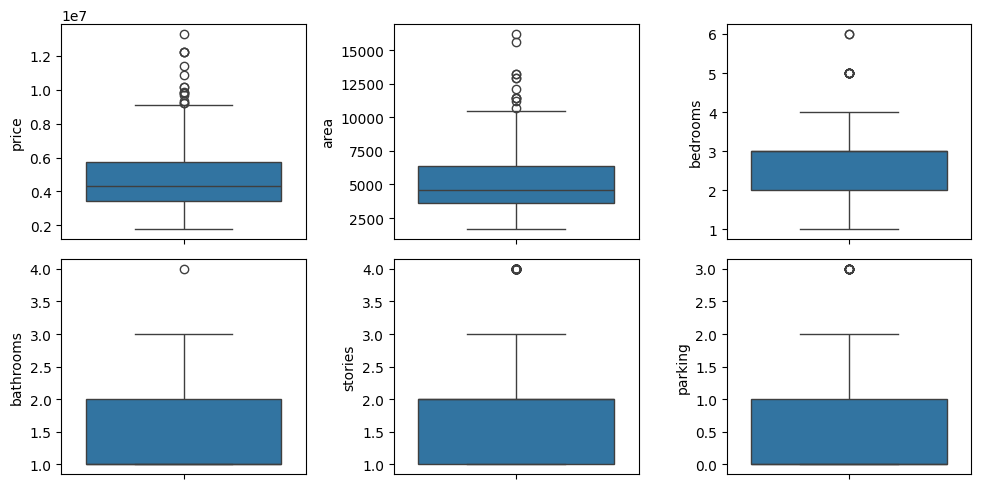

In [62]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(dataset['price'], ax = axs[0,0])
plt2 = sns.boxplot(dataset['area'], ax = axs[0,1])
plt3 = sns.boxplot(dataset['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(dataset['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(dataset['stories'], ax = axs[1,1])
plt3 = sns.boxplot(dataset['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x16fa0a10d00>,
 'caps': [<matplotlib.lines.Line2D at 0x16fa0a11240>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fa0a10a60>],
 'medians': [<matplotlib.lines.Line2D at 0x16fa0a11780>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fa0a11a20>],
 'means': []}

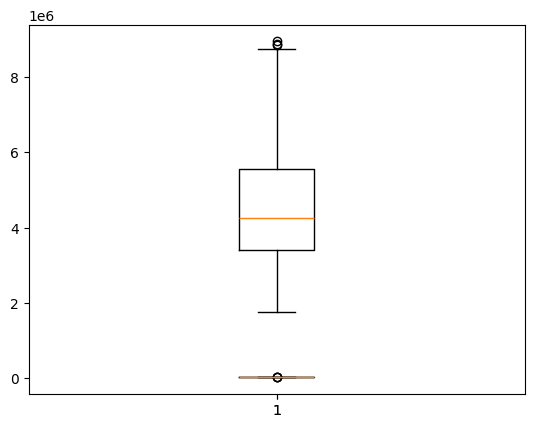

In [63]:
# Dealing with outliers in area 
Q1 = dataset.area.quantile(0.25)
Q3 = dataset.area.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.area >= Q1 - 1.5*IQR) & (dataset.area <= Q3 + 1.5*IQR)]
plt.boxplot(dataset.area)

# Dealing with outliers in price 
Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.price >= Q1 - 1.5*IQR) & (dataset.price <= Q3 + 1.5*IQR)]

plt.boxplot(dataset.price)

In [64]:
dataset.duplicated().sum()

np.int64(0)

In [65]:
data = dataset[['guestroom', 'basement', 'mainroad', 'airconditioning', 'hotwaterheating', 'prefarea']]
ohe = OneHotEncoder(drop = "first")
encoded_data = ohe.fit_transform(data).toarray() 

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(data.columns), index=dataset.index) #)

dataset = pd.concat([dataset, encoded_df], axis=1)
dataset = dataset.drop(data, axis = 1)

In [66]:
ordinal_encoder_data = [['furnished', 'semi-furnished', 'unfurnished']]
oee = OrdinalEncoder(categories = ordinal_encoder_data)
dataset['furnishingstatus'] = oee.fit_transform(dataset[['furnishingstatus']])

In [67]:
dataset.head(3)

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,guestroom_yes,basement_yes,mainroad_yes,airconditioning_yes,hotwaterheating_yes,prefarea_yes
17,8500,3,2,4,2,0.0,8960000,0.0,0.0,1.0,1.0,0.0,0.0
18,4600,3,2,2,2,0.0,8890000,1.0,0.0,1.0,1.0,0.0,0.0
19,6420,3,2,2,1,1.0,8855000,0.0,0.0,1.0,1.0,0.0,1.0


In [68]:
print(dataset.columns.tolist())

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus', 'price', 'guestroom_yes', 'basement_yes', 'mainroad_yes', 'airconditioning_yes', 'hotwaterheating_yes', 'prefarea_yes']


In [69]:
ss = StandardScaler()
ss.fit(dataset[['area']])

StandardScaler()

In [70]:
sss = StandardScaler()
sss.fit(dataset[['price']])

StandardScaler()

In [71]:
dataset['area'] = pd.DataFrame(ss.transform(dataset[['area']]), columns = ["x"])

In [72]:
dataset['price'] = pd.DataFrame(sss.transform(dataset[['price']]), columns = ["x"])

In [73]:
dataset.isnull().sum()

area                   27
bedrooms                0
bathrooms               0
stories                 0
parking                 0
furnishingstatus        0
price                  27
guestroom_yes           0
basement_yes            0
mainroad_yes            0
airconditioning_yes     0
hotwaterheating_yes     0
prefarea_yes            0
dtype: int64

In [74]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy = "mean")
ar = si.fit_transform(dataset[['area','price']])
dataset[['area', 'price']] = ar

<Axes: xlabel='area', ylabel='price'>

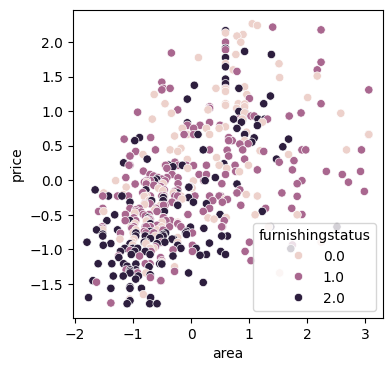

In [75]:
plt.figure(figsize = (4,4))
sns.scatterplot(y=dataset['price'],x=dataset['area'],hue=dataset['furnishingstatus'])

In [76]:
dataset.isnull().sum()

area                   0
bedrooms               0
bathrooms              0
stories                0
parking                0
furnishingstatus       0
price                  0
guestroom_yes          0
basement_yes           0
mainroad_yes           0
airconditioning_yes    0
hotwaterheating_yes    0
prefarea_yes           0
dtype: int64

In [77]:
dataset = dataset.reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['mainroad_yes']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.iloc[test_index]

strat_test_set['mainroad_yes'].value_counts()
strat_train_set['mainroad_yes'].value_counts()
dataset = strat_train_set.copy()

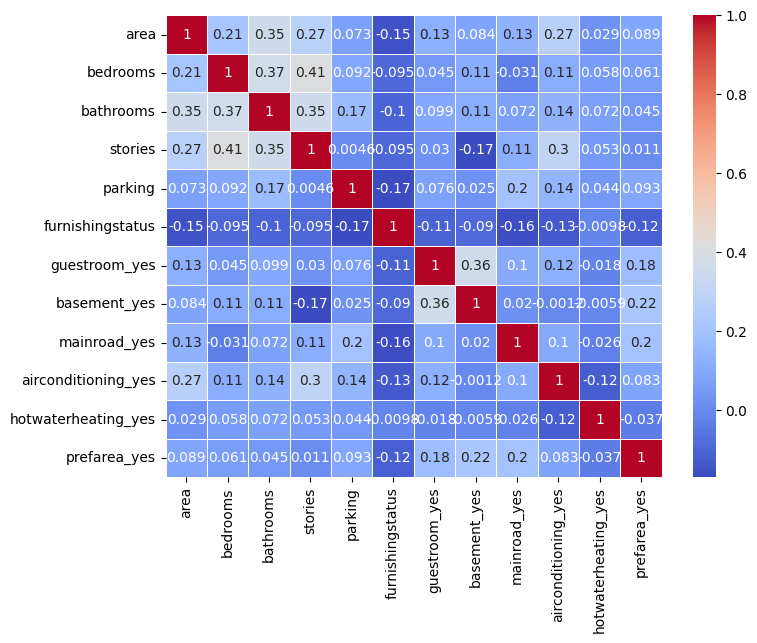

In [78]:
plt.figure(figsize = (8,6))
cor_matrix = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus', 'guestroom_yes', 'basement_yes', 'mainroad_yes', 'airconditioning_yes', 'hotwaterheating_yes', 'prefarea_yes']].corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [79]:
inputdata = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus', 'guestroom_yes', 'basement_yes', 'mainroad_yes', 'airconditioning_yes', 'hotwaterheating_yes', 'prefarea_yes']]
#dataset.iloc[:,:-1] 'price', 
outputdata = dataset['price']
inputdata_train, inputdata_test, outputdata_train, outputdata_test = train_test_split(inputdata, outputdata, test_size = 0.2, random_state = 42)

In [80]:
print(f'\nselected features: {inputdata_train.columns}')
print(f'len: {len(inputdata_train.columns)}\n')


selected features: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus', 'guestroom_yes', 'basement_yes', 'mainroad_yes',
       'airconditioning_yes', 'hotwaterheating_yes', 'prefarea_yes'],
      dtype='object')
len: 12



In [81]:
lr = LinearRegression()

In [82]:
lr.fit(inputdata_train, outputdata_train)

LinearRegression()

In [83]:
lr.score(inputdata_test, outputdata_test)*100

70.89122939179704

In [84]:
lr.predict([[0.338749,	2,	1,	1,	1,	2.0, 0.0,	0.0,	1.0,	1.0,	0.0,	0.0]])

array([-0.06927404])

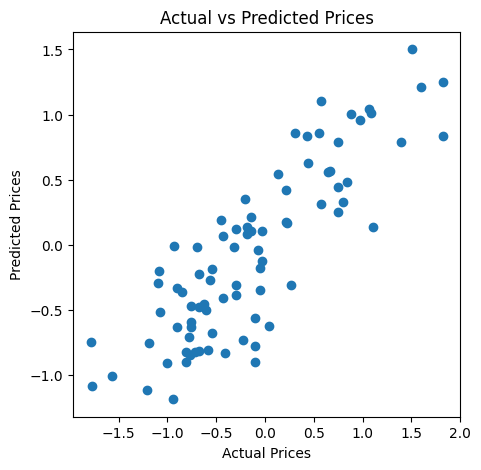

In [85]:
plt.figure(figsize  = (5,5))
plt.scatter(outputdata_test, lr.predict(inputdata_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [86]:
results=lr.predict(inputdata_test)
final_mse = mean_squared_error(outputdata_test, results)
final_rmse = np.sqrt(final_mse)
R2_score=r2_score(outputdata_test,results)
print(f'MSE of Linear Regression {final_mse}')
print(f'RMSE of Linear Regression {final_rmse}')
print(f'R^2 score of Linear Regression {R2_score}')

MSE of Linear Regression 0.1864482930584371
RMSE of Linear Regression 0.4317965875947112
R^2 score of Linear Regression 0.7089122939179704


In [87]:
rfr = RandomForestRegressor()

In [88]:
rfr.fit(inputdata_train, outputdata_train)
print(f'\nselected features: {inputdata_train.columns}')
print(f'len: {len(inputdata_train.columns)}\n')


selected features: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus', 'guestroom_yes', 'basement_yes', 'mainroad_yes',
       'airconditioning_yes', 'hotwaterheating_yes', 'prefarea_yes'],
      dtype='object')
len: 12



In [89]:
rfr.score(inputdata_test, outputdata_test)*100

69.22653419250946

In [90]:
rfr.predict([[0.338749,	2,	1,	1,	1,	2.0, 0.0,	0.0,	1.0,	1.0,	0.0,	0.0]])

array([-0.55060125])

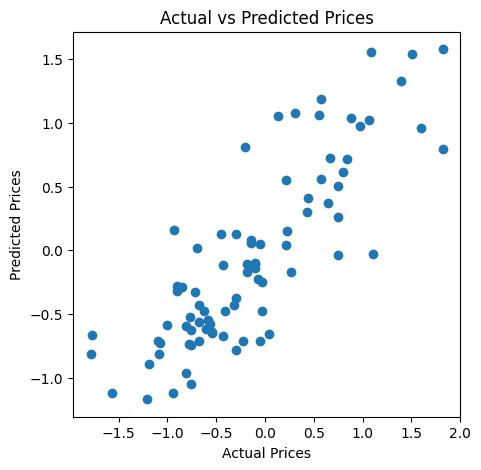

In [91]:
plt.figure(figsize  = (5,5))
plt.scatter(outputdata_test, rfr.predict(inputdata_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

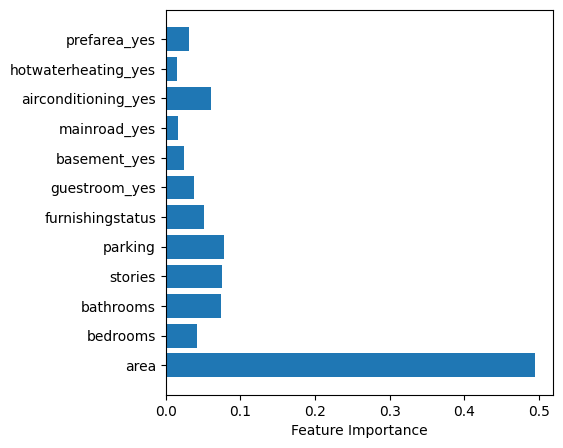

In [92]:
plt.figure(figsize  = (5,5))
importances = rfr.feature_importances_
features = inputdata.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()

In [93]:
results=rfr.predict(inputdata_test)
final_mse = mean_squared_error(outputdata_test, results)
final_rmse = np.sqrt(final_mse)
R2_score=r2_score(outputdata_test,results)
print(f'MSE of Random Forest Regression {final_mse}')
print(f'RMSE of Random Forest Regression {final_rmse}')
print(f'R^2 score of Random Forest Regression {R2_score}')

MSE of Random Forest Regression 0.19711104424595308
RMSE of Random Forest Regression 0.4439718957839033
R^2 score of Random Forest Regression 0.6922653419250946


In [94]:
model_SVR = svm.SVR()
model_SVR.fit(inputdata_train,outputdata_train)
results= model_SVR.predict(inputdata_test)
final_mse = mean_squared_error(outputdata_test, results)
final_rmse = np.sqrt(final_mse)
R2_score=r2_score(outputdata_test,results)
print(f'MSE of Support Vector Regression {final_mse}')
print(f'RMSE of Support Vector Regression {final_rmse}')
print(f'R^2 score of Support Vector Regression {R2_score}')

MSE of Support Vector Regression 0.19507774615080126
RMSE of Support Vector Regression 0.4416760647248176
R^2 score of Support Vector Regression 0.6954397774138292
